# Railgun - Distance (Ocean/Air)
## Hvordan beveger prosjektilet til en railgun ved gitt makshastighet?
#### Et computational essay av Elias T. Ruud og Mira Mors

## Introduksjon

Krutt har i mange år vært militærets mest gunstige måte å akselerere prosjektiler retter mot sine fiender. En skulle forvente at en ny metode vil dukke opp i nær fremtid. Railgun er en av de potensielle mulighetene. Selv om ordet railgun i seg selv høres ut som det er plukket ut av vokabularet til en som ser eksklusivt på science fiction, har modellen bak våpenet eksistert i mange år. Den første formen å akselerere et objekt ved et magnetfelt ble først utført av UIOs Kristian Birkeland rundt 1845 ved navnet coil gun. Konseptet ble videreført og i 2010 konstruerte marinen i USA en railgun som klarte å akselerere et objekt på 3.2kg til 2400 m/s (8600 km/t). Nylig utvikling har sett landbaserte railguns skuddrekkevidde nå over 160 km, ca distansen mellom Oslo og Kristiansand.

Denne oppgaven er ute etter å svare på noen få spørsmål. Hva er bevegelsen til prosjektilet? Hvor skal en sikte for å treffe? Hvordan påvirker ting som luftmotstand og coriioliskraften simuleringen? Dette er det oppgaven går ut på å løse. Istedenfor å se på alle de kompliserte faktorene som inngår i en moderne railgun, skal den initielle modellen se bort fra friksjon, høy varmeutvikling i systemet, elektromagnetisk induksjon, frastøtning mellom skinnene og potensiell strømning i vannet og luften.

## Oppbygning til en railgun
I motsetning til en typisk kanon som tar i bruk kjemiske reaksjoner, baseres railgunnen på elektromagnetiske prinsipper. Oppbygning til systemet er relativt enkelt. To parallelle ledende skinner er knyttet sammen av en bevegelig ledende bro. En potensialforskjell kobles til de to skinnene slik at det går strøm gjennom systemet (illustrert på figuren under). De to skinnene (langs “x-aksen”) danner et magnetfelt, pga. strømmen, i “z-retning”, slik at B-vektoren peker oppover i koordinatsystemet. Strømmen gjennom broen beveger seg langs “y-aksen” og ved kryssproduktet (qv x B) ser en at kraften på den bevegelige broen virker i x-retning(kjent som Lorenzkraften). Dette vil kunne akselerere objekter plassert på broen opp i veldig høye hastigheter. <br>
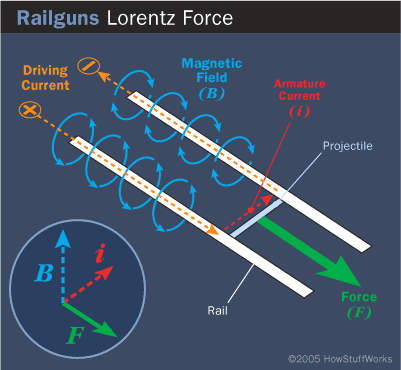



In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/58MmOpSm4LY?start=60;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Enkel modellering av en railgun 
Programmet som utledes for å besvare problemstillingen, baseres på den gitte modellen av en railgun for å finne utgangshastighet.

Starter med å importere numpy for beregningene og matpolotlib for den grafiske framstillingen.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Systemets parametere defineres etter en marine railgun. Distansen mellom skinnene settes til 15cm, deres tykkelse og lengde til henholdsvis 10cm og 10m. Prosjektilet veier  12.5kg, broen 2.5kg og strømmen settes til 2500kAmps.

In [3]:
D = .15 #separation of the rails and width of the bar. Set to 15cm
w = 0.1 #width of the rails. Set to 10cm each
L = 10 #length of the rails. Set to 10m
m_tot = 2.5+12.5 #set mass to 15kg
I_max = 2500000 #starting current. Set to 2500000 Amps

Følgende bestemmes initialverdiene.
Til å begynne med (ved t=0) er broen i ro og plasseret ved origo.
For de numeriske bevegelseslikningene må det defineres et visst tidssteg dt. 

In [4]:
barpos = 0
dt=0.00001 #initial timestep 0.00001s
t=0 #time starts at 0
v=0 #initial velocity set to 0

Videre trengs det en modell for å beregne kraften på broen og prosjektilet.

#### Kraften på broen <br>
Det gjøres først noen forenklinger. Hvis skinnenene antas å være lange, kan de ansees som uendelig lange ledninger. Magnetfeltet for en skinne blir dermed
$$B_{rail} = \frac{\mu_0}{2\pi}\frac{I}{r}$$
For å kunne beregne kraften på broen, deles broen i små deler av lengde dr. Hvis det går en strøm $I$ gjennom systemet, er størrelsen til kraften,$\mid dF_B\mid$, på en liten bro-del definert som
$$dF_B = IdrB$$
Som beskrevet over, virker kraften i x-retning.
Kraften (fra en skinne) som virker på broen beregnes ved å ingegrere $dF_B$ langs lengden til broen. Gitt tykkelsen w til skinnen og legnden D til broen fås at kraften blir
$$\frac{\mu_0}{2 \pi}I^2 \int_{\frac{w}{2}}^{D+\frac{w}{2}} \frac{1}{r}dr$$ $$=\frac{\mu_0}{2 \pi}I^2 \big(\ln(D+\frac{w}{2})-\ln(\frac{w}{2})\big)$$

Siden begge skinnene utover en like rettet kraft på broen, kan den funnete kraften ganges med to og det stårs igjen med
$$F_{B}=2\frac{\mu_0}{2 \pi}I^2 \big(\ln(D+\frac{w}{2})-\ln(\frac{w}{2})\big)$$

I tillegg vises det å være lurt å definere $\frac{\mu_0}{2 \pi}$ som en konstant.

In [5]:
Muover2pi = 2e-7 #magnetic constant

Nå er alt klart for å kunne beregne hastigheten til broen i det forenklede systemet: et friskjonsfritt området med uendelig lange og ledende skinner, der effekter på randen neglisjeres. 
Den magnetiske kraften på broen langs x-aksen beregnes ved hjelp av en løkke. Kraften benyttes så videre for å beregne hastigheten til broen.

In [6]:
while barpos < L:
    Fnet = 2*Muover2pi*(I_max**2)*(np.log(D+w/2)-np.log(w/2)) #Based on our calculated expression for the force on the bar
    v = v + Fnet/m_tot*dt #Update the velocity of the bar
    barpos = barpos + v*dt #Use velocity to update position
print(v) #Print the final value of the velocity


2148.7562597357905


In [7]:
print("En strøm på {0}kAmps gir dermed en hastighet lik {1:.1f}m/s.".format(I_max/1000,v))

En strøm på 2500.0kAmps gir dermed en hastighet lik 2148.8m/s.


## Treffe en stasjonær båt; med gravitasjon <br>
I det følgende eksemplet utelates vannmotstand, luftmotstand og corioliskraften. Gravitasjonen, når prosjektilet er i fritt fall, inkulderes i modellen. <br>
Eksemplet går ut på å treffe en stasjonær båt. Programmet beregner kollisjonshastighet og utskytningsvinkel til railgunen. Railgunen og båten antas å være på samme høyde. Railgunen befinner seg ved ekvator, mens båten befinner seg en avstand, $dis$, nordover. <br>
Gitt utgangshastigheten fra programmet over, kan vi beregne utskytningsvinkelen. 
#### Utregning for å finne vinkelen som en funksjon av utgangshastighet og avstanden til båten
Origo settes ved railgunen, y er høyden til prosjektilet og x er avstanden til båten. Gitt kollisjonshastighet $v_0$ (som er lik utgangshastigheten) får vi
\begin{align*}
v_{0,y} &= v_0 \cdot sin(\theta) & v_{0,x} &= v_0 \cdot cos(\theta) \\
y &= v_{0,y}\cdot t - \frac{1}{2}g\cdot t^2 = v_0 \cdot sin(\theta)\cdot t - \frac{1}{2}g\cdot t^2  & x &= v_{0,x}\cdot t = v_0 \cdot cos(\theta)\cdot t \\
& & t &= \frac{x}{v_0\cdot cos(\theta)}\\
\end{align*}

Når prosjektilet treffer båten er y = 0. Satt inn for y og t gitt ovenfor gir det
\begin{align*}
0 &=v_0 \cdot sin(\theta)\cdot t - \frac{1}{2}g\cdot t^2 \\
v_0 \cdot sin(\theta)\cdot \frac{x}{v_0\cdot cos(\theta)} &= \frac{1}{2}g\cdot \left(\frac{x}{v_0\cdot cos(\theta)}\right)^2\\
sin(\theta) \cdot cos(\theta) &= \frac{g\cdot x}{2v_0^2}\\
sin(2\theta) &= \frac{g\cdot x}{v_0^2}\\
\theta &= \frac{1}{2} sin^{-1} \left(\frac{g\cdot x}{v_0^2}\right)
\end{align*}



I det følgende defineres noen parametre som er nødvendig for simuleringen.  Så beregnes vinkelen som en funksjon av utgangshastighet og avstanden til båten.

In [8]:
g = 9.81 #gravitasjonskonstanten [m/s^2]
eps = 0.0001 #feilmargin
dis = 350000 #eksempel distansen [m] mellom railgun og målet
max = 2500000 #valgt maksimal avstand mellom railgunen og båten
x = np.linspace(0,max,round((max+1)/5000)) #ulike avstander mellom railgunen og båten
m = 12.5 #massen til prosjektilet

In [9]:
def find_theta(x,v0): #funksjonen finner vinkelen prosjektilet skytes ut ved en gitt avstand
    if (g*x/(v0**2))>=(1-eps): #acrcsin(x) er ikke definert for x>=1
       deg = "ikke tilgjengelig, siden arcsin(x) ikke er definert for x>=1"
       dis =  "not available"
    else:
       rad = (1/2*np.arcsin(g*x/(v0**2)))
       deg = float(rad*180/np.pi)
       dis = float(x)

    return deg, dis
theta_val, rekkevidde = find_theta(dis,v) 
print("Utskytningsvinkel er {0}° ved avstand {1}km.".format(theta_val,dis/1000)) 

Utskytningsvinkel er 24.02120890824163° ved avstand 350.0km.


Her plottes forholdet mellom vinkel og avstand.

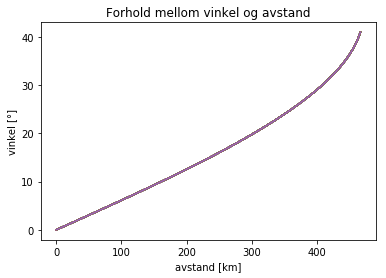

In [10]:
def f(x,v0): #funksjon som finner forhold mellom vinkel of avstand
    c = [] #liste med forskjellige avstands-verdier mellom railgunen og båten
    d = [] #liste med tilsvarende vinkel-verdier
    for i in x: #beregne vinkelen for hver avstand
        if (g*i/(v0**2))<(1-eps): #acrcsin(x) er ikke definert for x>=1
           rad = (1/2*np.arcsin(g*i/(v0**2)))
           deg = float(rad*180/np.pi)
           c.append(i/1000)
           d.append(deg)
    return c, d

x_ver, theta = f(x,v) #Verdier med samsvarnde avstand og vinkel

for i in range(len(x_ver)+1):
#Plotte forholdet mellom vinkel og avstand
    plt.plot(x_ver, theta)
plt.title("Forhold mellom vinkel og avstand")
plt.xlabel("avstand [km]")
plt.ylabel("vinkel [°]")
plt.savefig("Forhold mellom vinkel og avstand")
plt.show()

Ved større vinkel går prosjektilet lengre. Den maksimale avstanden nås ved en vinkel på ca 45°. <br>

I neste steg bergenges bevegelsen til prosjektilet med en funkjson som tar inn variabler: avstand, startfart, tidssteg, antall interasjoner, tilhørende vinkel, tettheten til mediet prosjketilet går gjennom og jordas rotasjonshastighet. I første eksemplet sees bort fra luftmotstand og corioliskraften som er avhengig av medietetthet og rotasjonshastigheten til jorden. Det tas hensyn til gravitasjon.<br>

Det legges til ekstra parametre som brukes senere.


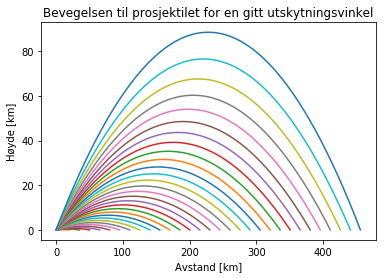

In [11]:
#Parametre for posjektilet
C_d = 0.295 #drag coefficient for a bullet, regnes som konstant
r = 0.075  #radius til sylinderen og kulen
A_front = 2*np.pi*r**2 #front arealet til prosjektilet
rho_vann = 1000 #tettheten til vann [kg/m^3]
rho_luft = 1.2754 #tettheten til luft [kg/m^3]
omega = 7.2921*10**(-5) #jordas rotasjon [rad/s], z-retning(ut av sentrum)

def posi(avstand,startfart, dt, n, vinkel, medietetthet,insys_omega): #funksjonen finner bevegelsen til prosjektilet, tetthhet til luft/vann etc, intertialsystemrotasjon
    r = np.zeros((n-1,3),float) #posisjonen til prosjektilet
    v = np.zeros((n-1,3),float) #hastigheten til prosjektilet
    t = np.zeros((n,1),float) #tid 
    a = np.zeros((n,3), float) #akselerasjonen til prosjektilet 
    omega_rot = insys_omega
    r[0] = [0,0,0] #startposisjon
    v[0] = [startfart*np.cos(np.deg2rad(vinkel)), startfart*np.sin(np.deg2rad(vinkel)),0] #starthastighet i x,y retning, gjør om vinkel i grader til radianer
    i = 0

    while t[i][0] < t_tot-0.02: #bevegelsen mens porsjektilet er i luften
        if r[i,1] < 0: #stopper iterasjonen når prosjektilet treffer båten ved høyden y = 0
            break
        cor_f = 2*m*(omega_rot*v[i][0])*np.array([0,0,1]) #corioliskraft virker østover
        drag = -(v[i]/np.linalg.norm(v[i]))*medietetthet*v[i]**2*C_d*A_front/(2*m) #drag deceleration [m/s^2]
        Fy = m*(-g)*np.array([0,1,0]) #kraften på porsjektilet i y-retning gitt akselerasjonen
        Fnet = Fy+drag+cor_f #netto kraften
        a[i, :] = Fnet/m #acceleration vector
        v[i+1,:] = v[i,:] + dt*a[i, :] #velocity vector
        r[i+1,:] = r[i,:] + dt*v[i+1,:] #position vector
        t[i+1] = t[i] + dt 
        i = i + 1
    return r,v, i

t_tot = 2000 #hensiktemssig tid slik at banene til prosjektilet fullføres
dt = 0.01 #tidssteg
n = int(np.ceil(t_tot/dt))

for k in range(1,len(theta),3): #for å plotte noen av beregningene for utskytningsvinkelen, hentes ut hver tredje verdi i de tilsvarende listene
    pos, vel, i = posi(x_ver[k],v,dt,n,theta[k],0, 0) #posisjonen til prosjektilet for k-vinkler
    plt.plot(pos[0:i, 0]/1000, pos[0:i,1]/1000) #plotter bevegelsen til prosjektilet for en gitt utskytningsvinkel
plt.xlabel("Avstand [km]")
plt.ylabel("Høyde [km]")
plt.title("Bevegelsen til prosjektilet for en gitt utskytningsvinkel")
#plt.savefig("Bevegelsen til prosjektilet for gitte utskytningsvinkeler")
plt.show()


Siden x-komponenten til farten er konstant, er hver bevegelseskurve symmetrisk med en forksyvning av topppunktet.

## Utvidet modell med luftmotstand og corioliskraft
I neste steg forbedres modellen ved å inkludere luftmotstanden og corioliskraften om prosjektilet skytes mot rett nord. <br>
Vi antar at prosjektilet ligner på en lang kule som består av en halvkule og en sylinder. Da kan luftmostanden, $F_{Drag}$, simuleres på følgende måte
$$ F_{Drag} = \frac{1}{2}C_d \rho V^2 A $$
der $\rho$ er tettheten, $V$ er hastigheten til prosjektilet, $C_d$ er en konstant og $A$ er frontarealet.
Ifølge NASAs nettside er $C_d$ for en kule lik 0,295. <br>
Gitt kulens radius av 0.075m, blir frontarelet blir 0,035$m^2$. Massen til prosjektilet er 20kg.
 <br>

Om en skal være presis over en lang avstand, er det hensiktmessig å inkludere corioliskraften i modellen. Kraften blir utrykt ved $$F_{Cor} = -2m\Omega \times v' $$
hvor $\Omega$ er lik rotasjonshastigheten til jorden og $v'$ er hastigheten til prosjektilet. Når x legges nordover, y vestover og z radielt utover fra jorden, så vil $\Omega$ vare i z-retning. Prosjektilet beveges nordover i x-retning og dermed vil det negativet kryssproduktet ha en komponent østover. Med andre ord virker $F_{Cor}$ til høyre. (NB i prommgrammet tilsvarer y høden til prosjektilet.)
<br>

Programmet inkludert luftmotstand blir dermed



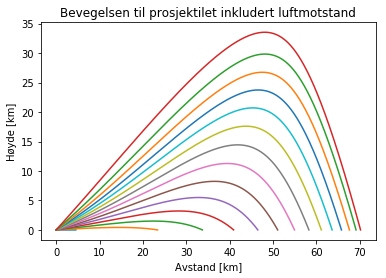

In [12]:
for k in range(1,len(theta),7): #for å plotte noen av beregningene for utskytningsvinkelen, hentes ut hver tredje verdi i de tilsvarende listene
    pos, vel,i = posi(x_ver[k],v,dt,n,theta[k],rho_luft, 0)
    plt.plot(pos[0:i, 0]/1000, pos[0:i,1]/1000) #plotter bevegelsen til prosjektilet for en gitt utskytningsvinkel

plt.xlabel("Avstand [km]")
plt.ylabel("Høyde [km]")
plt.title("Bevegelsen til prosjektilet inkludert luftmotstand")
#plt.savefig("Bevegelsen til prosjektilet inkludert luftmotstand")
plt.show()

På grunn av luftmotstand vil kurvene bli avbøyd, slik at den maksimale avstanden blir mye kortere enn den i første simulasjonen. I tillegg kommer prosjektilet ikke like langt opp.<br>

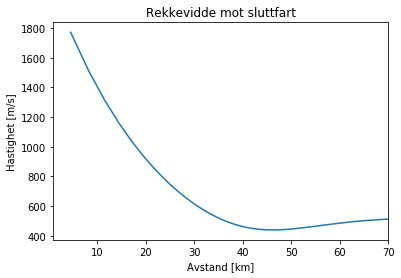

In [13]:
#Plotter forholdet mellom maks avstand til prosjektilet og dets sluttfart(ved vannets overflate).
sluttfart = []
maks_avstand = []
for k in range(1,len(theta),1):
    pos, vel, i = posi(x_ver[k],v,dt,n,theta[k],rho_luft, 0)
    sluttfart.append(np.linalg.norm(vel[i]))
    maks_avstand.append(pos[i]/1000)

plt.plot(maks_avstand,sluttfart)
plt.xlabel("Avstand [km]")
plt.ylabel("Hastighet [m/s]")
plt.title("Rekkevidde mot sluttfart")
plt.xlim([1,70])
#plt.savefig("Rekkevidde mot sluttfart")
plt.show()


Grafen over viser forholdet mellom rekkevidde og hastigheten prosjektilet har når den treffer vannoverflaten.

In [14]:
print("Plottet under viser effekten av luftmotstanden for en gitt utskytningsvinkel lik {:.1f}°.".format(theta[k]))

Plottet under viser effekten av luftmotstanden for en gitt utskytningsvinkel lik 40.9°.


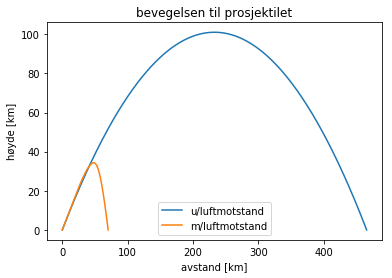

In [15]:
#sammenligne bevegelsen med og uten luftmotstand ved en bestemt vinkel
pos0, fart0, i0 = posi(x_ver[k],v,dt,n,theta[k],0, 0) 
posl, fartl, il = posi(x_ver[k],v,dt,n,theta[k],rho_luft, 0)
plt.plot(pos0[0:i0, 0]/1000, pos0[0:i0,1]/1000, label="u/luftmotstand")
plt.plot(posl[0:il, 0]/1000, posl[0:il,1]/1000, label="m/luftmotstand")
plt.xlabel("avstand [km]")
plt.ylabel("høyde [km]")
plt.title("bevegelsen til prosjektilet")
plt.legend()
plt.show()

I koden under legges corioliseffekten til i modellen.

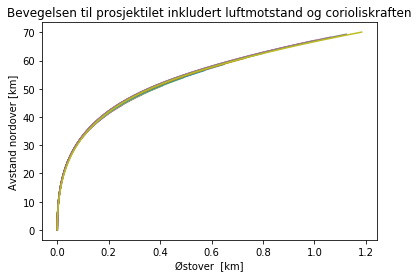

In [16]:
for k in range(1,len(theta),5): #for å plotte noen av beregningene for utskytningsvinkelen, hentes ut hver tredje verdi i de tilsvarende listene
    pos, fart, i = posi(x_ver[k],v,dt,n,theta[k],rho_luft, omega)
    plt.plot(pos[0:i,2]/1000, pos[0:i, 0]/1000) #plotter bevegelsen til prosjektilet for en gitt utskytningsvinkel
plt.xlabel("Østover  [km]")
plt.ylabel("Avstand nordover [km]")
plt.title("Bevegelsen til prosjektilet inkludert luftmotstand og corioliskraften")
#plt.savefig("bevegelsen til prosjektilet inkludert luftmotstand og corioliskraften")
plt.show()

Grafen viser effekten av corioliskraften på prosjektilet. Om prosjektilet skytes rett nord, vil corioliskraften avbøye prosjektilet til øst. Med uskytningsvinkel på ca. 40°, vil den bli avbøyd hele 1.2 kilometer. <br>

## Konklusjon
Formålet var å finnne bevegelsen til et prosjektil gitt en maksimal hastighet og andre relevante sammenhenger for banene. For å finne den elektromagnetiske kraften utført på prosjektilet, bruktes den gitte modellen til en railgun. Kraften akselerer prosjektilet til en hastighet på 2148.8m/s. For å treffe ulike mål langs havet, ble tilhørende vinkler kalkulert. Naturligvis gir vinkelen nærmest 45° størst rekkevide. Ved gitt avstand og utskytningsvinkel plottes bevegelsen til prosjektilet. Inkludert luftmotstand blir prosjektilets bane avbøyd betydelig. Fra en rekkevide på ca. 450km, ga den nye modellen bare en distanse på 70km. Ca 15% av den oprinnelige modellen. <br>
På grunn av den store farten, vil corioliskraften ha en vesentlig innflyttlese på banen. Om prosjektilet skytes rett nord, blir banen forskjøvet 1.2km østver. <br>

Modellen brukt i dette essayet er basert på en forenklet virkelighet. Faktorer som indusert magnetfelt, ekstrem varme, begrenset kapitans, mangel på nøyaktige dimensjoner til railgunnen, friksjon mellom skinnenene og broen, frastøtning mellom skinnene og luftmotstandkonstanten som varierer med hastighet er ikke inkludert i modellen. På tross av disse forenklingene er det ikke helt urealistisk at denne rekkevidden på 120 km kan være oppnålig i nær fremtid. I følge USA vil Kina ha fullført sin testing av skipbaserte railguns i løpet av noen år og ha et ferdig produkt montert innen 2025.



  


#### Kilder
https://science.howstuffworks.com/rail-gun1.htm
http://www.navweaps.com/Weapons/WNUS_Rail_Gun.php
https://www.baesystems.com/en/product/electromagnetic--em--railgun
https://www.wired.com/2014/04/electromagnetic-railgun-launcher/
https://thediplomat.com/2019/06/us-navys-railgun-entering-new-testing-phases/
https://www.businessinsider.com/us-navy-talking-about-finally-testing-railgun-at-sea-2019-5?r=US&IR=T
https://www.economist.com/news/science-and-technology/21650519-americas-navy-wants-arm-its-ships-electrically-powered-superguns-rail?fsrc=scn/fb/te/pe/ed/railguntestvid